**[VIRTUAL INTERNSHIP] : Home Credit Indonesia Data Scientist Program**

Hi, there!
Here, I present my final project virtual internship program run by Rakamin Academy

> Created by: Novita Yolanda Barus




## 0.0 Objective 

Home Credit is an international **non-bank financial institution** founded in 1997 in the Czech Republic and headquarteres in Netherlands. The company operates in 9 countries including Indonesia and focuses on installment lending primarily to people with little or no credit history.


> Through the given data, we will anaylze and make a model to make sure the customer (*able to fulfill the loan*) who wants to apply for loan is *not rejected*
The label target:
*   1: client with payment difficulties
*   0: client without payment difficulties





## 1 - Import Library

In [111]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [112]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2 - Data Preparation and Cleansing

To do our analyze and modeling, I use four data frame to support the model used later on. They are, 
1.   **Application Train**: The main table with TARGET and without TARGET
2.   **Bureau**: Client's previous credits provided by other financial institutions
3.   **Previous Application**: Previous applications for Home Credit loans of client who have loans in the sample
4. Credit Card Balance: Monthly balance snapshots of previous credit cards that the applicant has 





#### a. Data Train

In [113]:
path = '/content/drive/MyDrive/Data Frame Home Credit/application_train.csv'
df_train = pd.read_csv(path)
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
print('Data Train Shape:', df_train.shape)
print('\nData Train Columns:', df_train.columns)

Data Train Shape: (307511, 122)

Data Train Columns: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


Since variable SK_ID_CURR represents every each row in our dataset, it means there is no data duplicated ini our data frame

In [115]:
df_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [116]:
used_column = []
for i in range (0,10):
  used_column.append(i)

for i in range (12,19):
  used_column.append(i)

for i in range (29, 31):
  used_column.append(i)

In [117]:
df_application = df_train.iloc[:, used_column]
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,1.0,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,2.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,1.0,2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,2.0,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,1.0,2


I will only use the important variable that I use in modeling phase. There are: **SK_ID_CURR,TARGET,	NAME_CONTRACT_TYPE,	CODE_GENDER, FLAG_OWN_CAR,	FLAG_OWN_REALTY,	CNT_CHILDREN,	AMT_INCOME_TOTAL,	AMT_CREDIT,	AMT_ANNUITY,NAME_INCOME_TYPE,	NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,	NAME_HOUSING_TYPE,	REGION_POPULATION_RELATIVE,	DAYS_BIRTH,	DAYS_EMPLOYED,	CNT_FAM_MEMBERS,	REGION_RATING_CLIENT**

In [118]:
df_application['DAYS_BIRTH']= df_application['DAYS_BIRTH']*-1/365
df_application['DAYS_BIRTH']= np.floor(df_application['DAYS_BIRTH'])
df_application['DAYS_BIRTH']= df_application['DAYS_BIRTH'].astype('int')
df_application.columns = df_application.columns.str.replace('DAYS_BIRTH', 'AGE')

In [119]:
df_application['DAYS_EMPLOYED'] = df_application['DAYS_EMPLOYED']*-1/365
df_application['DAYS_EMPLOYED']= np.floor(df_application['DAYS_EMPLOYED'])
df_application['DAYS_EMPLOYED']= df_application['DAYS_EMPLOYED'].astype('int')
df_application.columns = df_application.columns.str.replace('DAYS_EMPLOYED', 'LENGTH_SERVICE')


In [120]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,LENGTH_SERVICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,1.0,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,45,3,2.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,1.0,2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,2.0,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,8,1.0,2


In [121]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  NAME_INCOME_TYPE            307511 non-null  object 
 11  NAME_EDUCATION_TYPE         307511 non-null  object 
 12  NAME_FAMILY_STATUS          307511 non-null  object 
 13  NAME_HOUSING_T

#### b. Data Previous Application

In [122]:
path = '/content/drive/MyDrive/Data Frame Home Credit/previous_application.csv'
df_prev_app = pd.read_csv(path)
df_prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df_prev_app.shape

(1670214, 37)

In [124]:
df_prev_app = pd.DataFrame(
    df_prev_app.groupby('SK_ID_CURR').agg(COUNT=('SK_ID_CURR', 'count'))).reset_index()
df_prev_app

,SK_ID_CURR,COUNT
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2
...,...,...
338852,456251,1
338853,456252,1
338854,456253,2
338855,456254,2


#### c. Data Buerau

In [125]:
path= '/content/drive/MyDrive/Data Frame Home Credit/bureau.csv'
df_buerau= pd.read_csv(path)
df_buerau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [126]:
df_buerau['CREDIT_ACTIVE'].unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [127]:
df_buerau.drop(df_buerau.loc[(df_buerau['CREDIT_ACTIVE']=='Sold') |
                              (df_buerau['CREDIT_ACTIVE']=='Closed')].index, inplace=True)

bureau_fixed = pd.DataFrame(data=(
    pd.pivot_table(df_buerau, values='AMT_CREDIT_SUM', index='SK_ID_CURR', aggfunc='sum')),
).reset_index()

Due to, we only select the **active credit**, we will inplace the *Sold* and Closed credit of customer

In [128]:
bureau_fixed.head()

,SK_ID_CURR,AMT_CREDIT_SUM
0,100001,884025.000
1,100002,481988.565
2,100003,810000.000
3,100005,598626.000
4,100008,267606.000


In [129]:
df_train_merge = pd.merge(df_application, df_prev_app, on='SK_ID_CURR')

In [130]:
df_train_merge1 = pd.merge(df_train_merge, bureau_fixed, on='SK_ID_CURR')
df_train_merge1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,LENGTH_SERVICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,COUNT,AMT_CREDIT_SUM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,1.0,2,1,481988.565
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Higher education,Married,House / apartment,0.003541,45,3,2.0,1,3,810000.000
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Secondary / secondary special,Married,House / apartment,0.035792,46,4,2.0,2,5,267606.000
3,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,Higher education,Married,House / apartment,0.035792,37,8,3.0,2,7,1527561.000
4,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,Higher education,Married,House / apartment,0.003122,51,1,2.0,3,1,675000.000


In [131]:
df_train_merge1.shape

(206276, 21)

In [132]:
df_train_merge1['COUNT'] = df_train_merge1['COUNT'].fillna(0)

In [133]:
df_train_merge1['AMT_CREDIT_SUM'] = df_train_merge1['AMT_CREDIT_SUM'].fillna(0)

In [134]:
df_train_merge1['COUNT'] = df_train_merge1['COUNT'].apply(
    lambda x: 'New' if x == 0 else 'Existing')
df_train_merge1['AMT_CREDIT_SUM'] =df_train_merge1['AMT_CREDIT_SUM'].apply(
    lambda x: 'N' if x == 0 else 'Y')

In [135]:
df_train_merge1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,LENGTH_SERVICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,COUNT,AMT_CREDIT_SUM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,1.0,2,Existing,Y
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Higher education,Married,House / apartment,0.003541,45,3,2.0,1,Existing,Y
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Secondary / secondary special,Married,House / apartment,0.035792,46,4,2.0,2,Existing,Y
3,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,Higher education,Married,House / apartment,0.035792,37,8,3.0,2,Existing,Y
4,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,Higher education,Married,House / apartment,0.003122,51,1,2.0,3,Existing,Y


In [136]:
df_train_merge1.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                   10
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
AGE                            0
LENGTH_SERVICE                 0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
COUNT                          0
AMT_CREDIT_SUM                 0
dtype: int64

In [137]:
df_train_merge1['AMT_ANNUITY']= df_train_merge1['AMT_ANNUITY'].fillna(df_train_merge1['AMT_ANNUITY'].mean())

In [138]:
df_train_merge1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,LENGTH_SERVICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,COUNT,AMT_CREDIT_SUM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,1.0,2,Existing,Y
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Higher education,Married,House / apartment,0.003541,45,3,2.0,1,Existing,Y
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Secondary / secondary special,Married,House / apartment,0.035792,46,4,2.0,2,Existing,Y
3,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,Higher education,Married,House / apartment,0.035792,37,8,3.0,2,Existing,Y
4,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,Higher education,Married,House / apartment,0.003122,51,1,2.0,3,Existing,Y


In [139]:
df_train_merge1['CODE_GENDER'].value_counts()

F      138197
M       68075
XNA         4
Name: CODE_GENDER, dtype: int64

#### d. Data Credit Card Balance

In [140]:
path ='/content/drive/MyDrive/Data Frame Home Credit/credit_card_balance.csv'
df_credit = pd.read_csv(path)
df_credit.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [141]:
df_credit.shape

(3840312, 23)

In [142]:
df_credit= df_credit[['SK_ID_PREV','SK_ID_CURR', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT']]

In [143]:
df_credit = pd.DataFrame(data=(
    pd.pivot_table(df_credit, values='AMT_PAYMENT_CURRENT', index='SK_ID_CURR', aggfunc='sum')),
).reset_index()

In [144]:
df_credit.head()

,SK_ID_CURR,AMT_PAYMENT_CURRENT
0,100006,0.00
1,100011,358386.75
2,100013,688161.24
3,100021,0.00
4,100023,0.00


#### Data Installment Payment

In [145]:
df_path = '/content/drive/MyDrive/Data Frame Home Credit/installments_payments.csv'
df_installment = pd.read_csv(path)
df_installment.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [146]:
df_installment = pd.DataFrame(data=(
    pd.pivot_table(df_installment, values='AMT_BALANCE', index='SK_ID_CURR', aggfunc='sum')),
).reset_index()

In [147]:
df_installment.head()

,SK_ID_CURR,AMT_BALANCE
0,100006,0.000
1,100011,4031676.225
2,100013,1743352.245
3,100021,0.000
4,100023,0.000


In [148]:
df_train= df_train_merge1.join(
    df_installment.set_index('SK_ID_CURR'), on='SK_ID_CURR', how='left')

In [149]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,LENGTH_SERVICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,COUNT,AMT_CREDIT_SUM,AMT_BALANCE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Single / not married,House / apartment,0.018801,25,1,1.0,2,Existing,Y,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Married,House / apartment,0.003541,45,3,2.0,1,Existing,Y,NaN
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Married,House / apartment,0.035792,46,4,2.0,2,Existing,Y,NaN
3,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,Married,House / apartment,0.035792,37,8,3.0,2,Existing,Y,NaN
4,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,Married,House / apartment,0.003122,51,1,2.0,3,Existing,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206271,456246,0,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,...,Married,House / apartment,0.010966,44,23,3.0,2,Existing,Y,105093.855
206272,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,...,Single / not married,House / apartment,0.022800,32,1,1.0,2,Existing,Y,2205557.640
206273,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,Single / not married,House / apartment,0.022800,66,-1001,1.0,2,Existing,Y,NaN
206274,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,Separated,House / apartment,0.005002,41,21,1.0,3,Existing,Y,NaN


In [150]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206276 entries, 0 to 206275
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  206276 non-null  int64  
 1   TARGET                      206276 non-null  int64  
 2   NAME_CONTRACT_TYPE          206276 non-null  object 
 3   CODE_GENDER                 206276 non-null  object 
 4   FLAG_OWN_CAR                206276 non-null  object 
 5   FLAG_OWN_REALTY             206276 non-null  object 
 6   CNT_CHILDREN                206276 non-null  int64  
 7   AMT_INCOME_TOTAL            206276 non-null  float64
 8   AMT_CREDIT                  206276 non-null  float64
 9   AMT_ANNUITY                 206276 non-null  float64
 10  NAME_INCOME_TYPE            206276 non-null  object 
 11  NAME_EDUCATION_TYPE         206276 non-null  object 
 12  NAME_FAMILY_STATUS          206276 non-null  object 
 13  NAME_HOUSING_T

In [151]:
df_train.shape

(206276, 22)

In [152]:
df_train['AMT_BALANCE'] = df_train['AMT_BALANCE'].fillna(0)
df_train['AMT_ANNUITY'] = df_train['AMT_ANNUITY'].fillna(df_train['AMT_ANNUITY'].mean())

df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,LENGTH_SERVICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,COUNT,AMT_CREDIT_SUM,AMT_BALANCE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Single / not married,House / apartment,0.018801,25,1,1.0,2,Existing,Y,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Married,House / apartment,0.003541,45,3,2.0,1,Existing,Y,0.0
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Married,House / apartment,0.035792,46,4,2.0,2,Existing,Y,0.0
3,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,Married,House / apartment,0.035792,37,8,3.0,2,Existing,Y,0.0
4,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,Married,House / apartment,0.003122,51,1,2.0,3,Existing,Y,0.0


In [153]:
df_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
AGE                           0
LENGTH_SERVICE                0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
COUNT                         0
AMT_CREDIT_SUM                0
AMT_BALANCE                   0
dtype: int64

#### Data Test

In [154]:
path = '/content/drive/MyDrive/Data Frame Home Credit/application_test.csv'
df_test = pd.read_csv(path)
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
df_test = df_test.iloc[:, used_column]
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,2,2
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,2,2
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,2,2
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,2,2
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,2,2


In [156]:
df_test['DAYS_BIRTH']= df_test['DAYS_BIRTH']*-1/365
df_test['DAYS_BIRTH']= np.floor(df_test['DAYS_BIRTH'])
df_test['DAYS_BIRTH']= df_test['DAYS_BIRTH'].astype('int')
df_test.columns = df_test.columns.str.replace('DAYS_BIRTH', 'AGE')

In [157]:
df_test['DAYS_EMPLOYED'] = df_test['DAYS_EMPLOYED']*-1/365
df_test['DAYS_EMPLOYED']= np.floor(df_test['DAYS_EMPLOYED'])
df_test['DAYS_EMPLOYED']= df_test['DAYS_EMPLOYED'].astype('int')
df_test.columns = df_test.columns.str.replace('DAYS_EMPLOYED', 'LENGTH_SERVICE')


In [158]:
df_test_merge = pd.merge(df_test, df_prev_app, on='SK_ID_CURR')

In [159]:
df_test_merge1 = pd.merge(df_test_merge, bureau_fixed, on='SK_ID_CURR')
df_test_merge1.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,LENGTH_SERVICE,DAYS_REGISTRATION,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,COUNT,AMT_CREDIT_SUM
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,Married,House / apartment,0.018850,52,6,-5170.0,2,2,1,884025.00
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,Married,House / apartment,0.035792,49,12,-9118.0,2,2,2,598626.00
2,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,Married,House / apartment,0.026392,38,5,-2000.0,2,2,5,864721.08
3,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,Married,House / apartment,0.025164,50,32,-6116.0,2,2,9,4553388.00
4,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,Married,House / apartment,0.022800,45,7,-10125.0,2,2,4,164250.00


In [160]:
df_test_merge1['COUNT'] = df_test_merge1['COUNT'].fillna(0)
df_test_merge1['AMT_CREDIT_SUM'] = df_test_merge1['AMT_CREDIT_SUM'].fillna(0)

In [161]:
df_test_merge1['COUNT'] = df_test_merge1['COUNT'].apply(
    lambda x: 'New' if x == 0 else 'Existing')
df_test_merge1['AMT_CREDIT_SUM'] =df_test_merge1['AMT_CREDIT_SUM'].apply(
    lambda x: 'N' if x == 0 else 'Y')

In [162]:
df_test_merge1.isnull().sum()

SK_ID_CURR                      0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    19
AMT_GOODS_PRICE                 0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
AGE                             0
LENGTH_SERVICE                  0
DAYS_REGISTRATION               0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
COUNT                           0
AMT_CREDIT_SUM                  0
dtype: int64

In [163]:
df_test_merge1['AMT_ANNUITY']= df_test_merge1['AMT_ANNUITY'].fillna(df_test_merge1['AMT_ANNUITY'].mean())
df_test_merge1= df_test_merge1.drop(['COUNT'], axis=1)

In [164]:
df_test= df_test_merge1.join(
    df_installment.set_index('SK_ID_CURR'), on='SK_ID_CURR', how='left')

In [165]:
df_test.isnull().sum()

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
AGE                                0
LENGTH_SERVICE                     0
DAYS_REGISTRATION                  0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
AMT_CREDIT_SUM                     0
AMT_BALANCE                    22049
dtype: int64

In [166]:
df_test['AMT_BALANCE']= df_test['AMT_BALANCE'].fillna(df_test['AMT_BALANCE'].mean())

In [167]:
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,LENGTH_SERVICE,DAYS_REGISTRATION,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT_SUM,AMT_BALANCE
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,Married,House / apartment,0.018850,52,6,-5170.0,2,2,Y,2.135020e+06
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,Married,House / apartment,0.035792,49,12,-9118.0,2,2,Y,2.135020e+06
2,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,Married,House / apartment,0.026392,38,5,-2000.0,2,2,Y,3.961678e+05
3,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,Married,House / apartment,0.025164,50,32,-6116.0,2,2,Y,2.801919e+06
4,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,Married,House / apartment,0.022800,45,7,-10125.0,2,2,Y,2.135020e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34059,456202,Cash loans,F,Y,N,3,135000.0,252022.5,23112.0,217561.5,...,Civil marriage,House / apartment,0.009175,32,1,-174.0,2,2,Y,2.135020e+06
34060,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,Widow,House / apartment,0.002042,54,14,-9094.0,3,3,Y,2.135020e+06
34061,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,Married,House / apartment,0.026392,43,8,-2681.0,2,2,Y,2.135020e+06
34062,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,Married,House / apartment,0.018850,38,7,-1461.0,2,2,Y,2.135020e+06


## 3 - EXPLORATORY DATA ANALYSIS

In [168]:
df_train = df_train.drop('COUNT', axis=1)

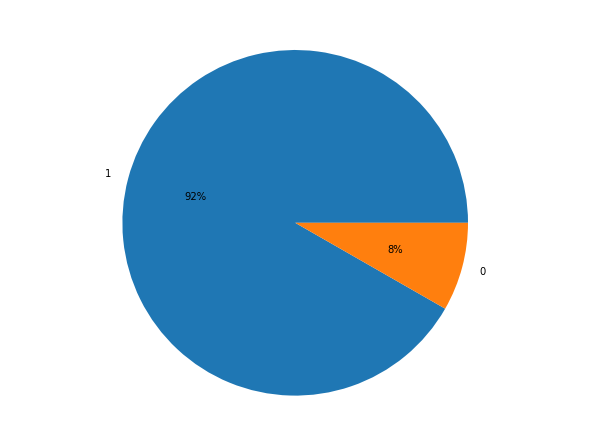

In [169]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('Equal')
labels = ['1', '0']
difficulties = df_train.TARGET.value_counts()
ax.pie(difficulties, labels=labels, autopct='%.0f%%')
plt.tight_layout()
plt.show()


> The precentage of variabel target from data training in **not blalance** enough. Where the customer wo has a difficulty to do a payment reaches **92%** and teh rest who doesnt have any difficulty is **8%**. Whether we need to balance it out or not, we will decide after run the model






In [170]:
 df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206276 entries, 0 to 206275
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  206276 non-null  int64  
 1   TARGET                      206276 non-null  int64  
 2   NAME_CONTRACT_TYPE          206276 non-null  object 
 3   CODE_GENDER                 206276 non-null  object 
 4   FLAG_OWN_CAR                206276 non-null  object 
 5   FLAG_OWN_REALTY             206276 non-null  object 
 6   CNT_CHILDREN                206276 non-null  int64  
 7   AMT_INCOME_TOTAL            206276 non-null  float64
 8   AMT_CREDIT                  206276 non-null  float64
 9   AMT_ANNUITY                 206276 non-null  float64
 10  NAME_INCOME_TYPE            206276 non-null  object 
 11  NAME_EDUCATION_TYPE         206276 non-null  object 
 12  NAME_FAMILY_STATUS          206276 non-null  object 
 13  NAME_HOUSING_T

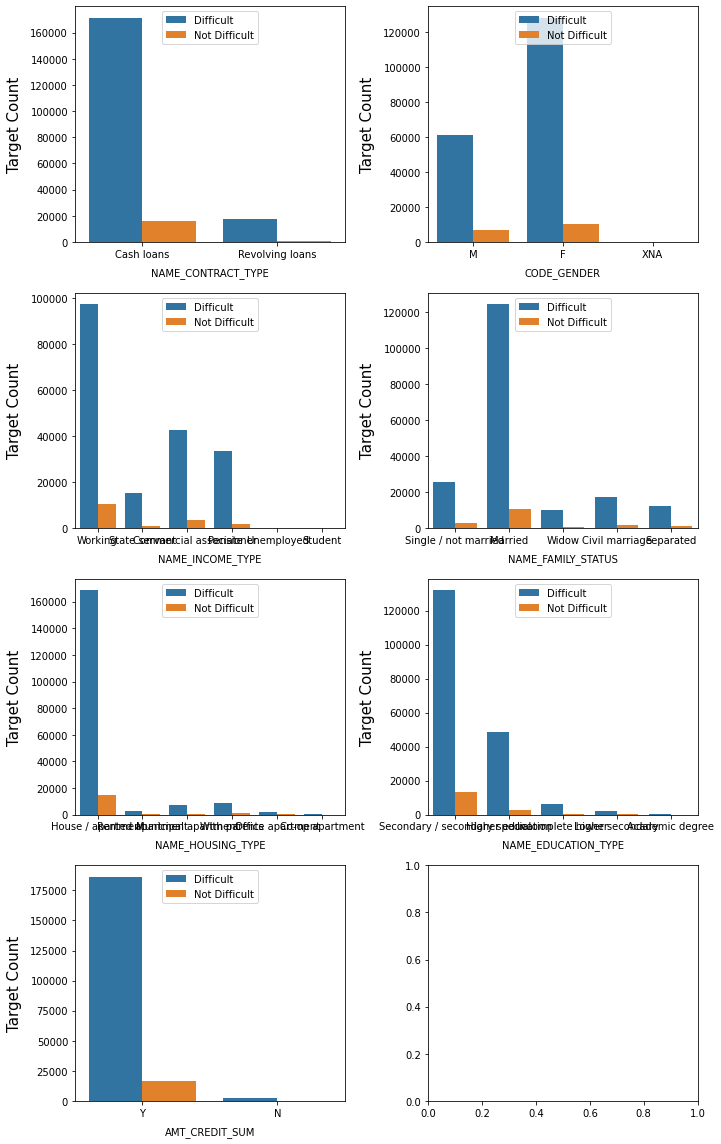

In [171]:
cat_feature =['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE', 'AMT_CREDIT_SUM']

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(10,16))
plt.subplots_adjust(right =1.5, top =1.25)

for i, feature in enumerate (cat_feature, 1):
  plt.subplot(4,2,i)
  sns.countplot(x= feature, hue='TARGET', data=df_train)
  plt.xlabel('{}'.format(feature), size=10, labelpad=8)
  plt.ylabel('Target Count', size=15, labelpad=8)
  plt.tick_params(axis='x', labelsize=10)
  plt.tick_params(axis='y', labelsize=10)
  plt.legend(['Difficult', 'Not Difficult'], loc ='upper center')

plt.tight_layout()
plt.show()



> Indented block
As we can see in this visualization, customer with **Cash Loan** , Female customer, working customer, married customer, customer with house/apartment are really likely to have difficulties to pay their loan.






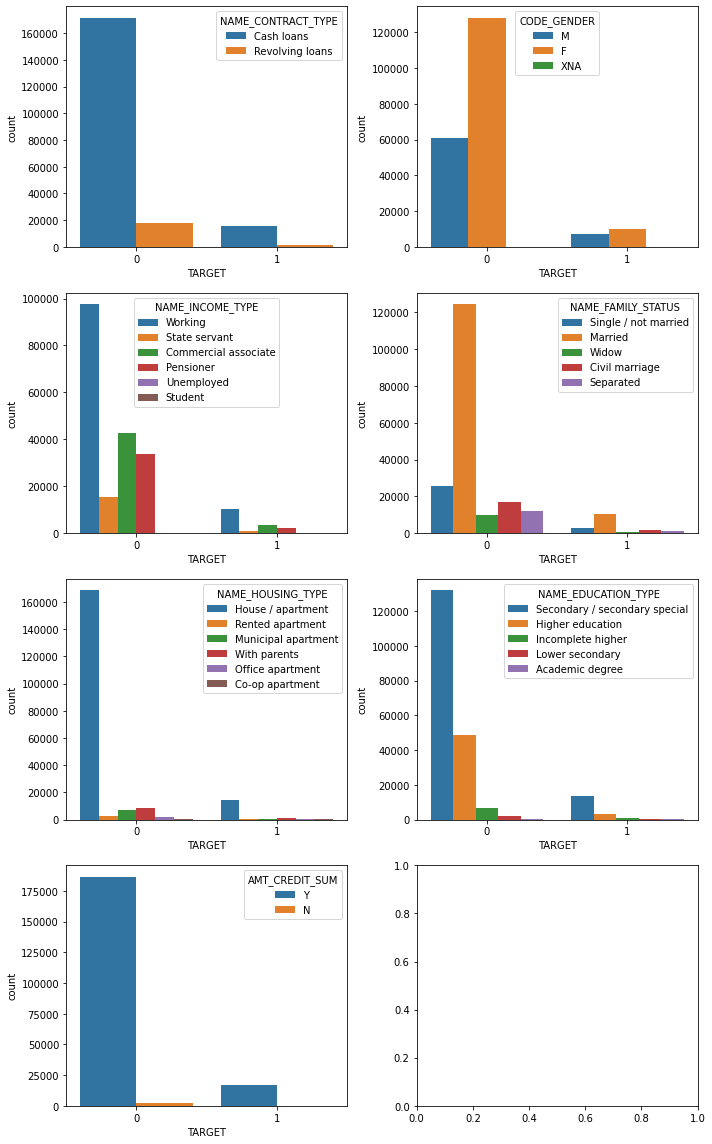

In [172]:
fig, axes = plt.subplots(4,2, figsize=(10,16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(cat_feature):
  plot = sns.countplot(x='TARGET', hue= df_train[col], ax=axes[i], data= df_train)

plt.tight_layout()
plt.show()

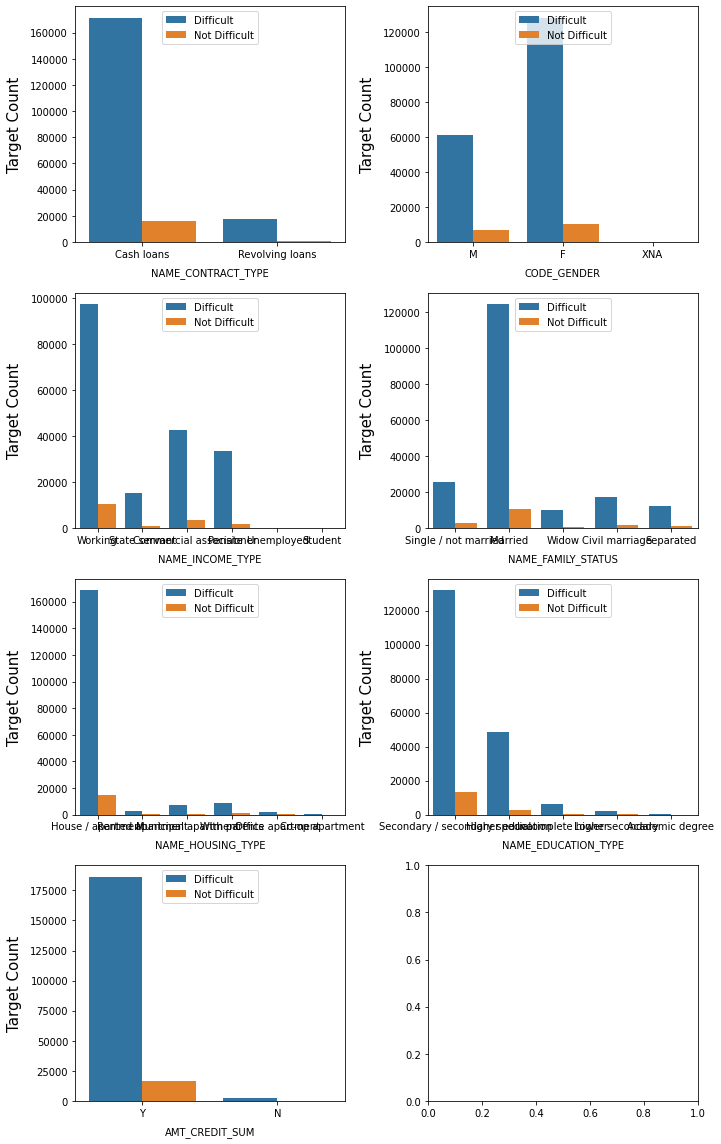

In [173]:
num_feature = ['CNT_CHILDREN', 'AGE', 'LENGTH_SERVICE', 'REGION_RATING_CLIENT', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_BALANCE']

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(10,16))
plt.subplots_adjust(right =1.5, top =1.25)

for i, feature in enumerate (cat_feature, 1):
  plt.subplot(4,2,i)
  sns.countplot(x= feature, hue='TARGET', data=df_train)
  plt.xlabel('{}'.format(feature), size=10, labelpad=8)
  plt.ylabel('Target Count', size=15, labelpad=8)
  plt.tick_params(axis='x', labelsize=10)
  plt.tick_params(axis='y', labelsize=10)
  plt.legend(['Difficult', 'Not Difficult'], loc ='upper center')

plt.tight_layout()
plt.show()

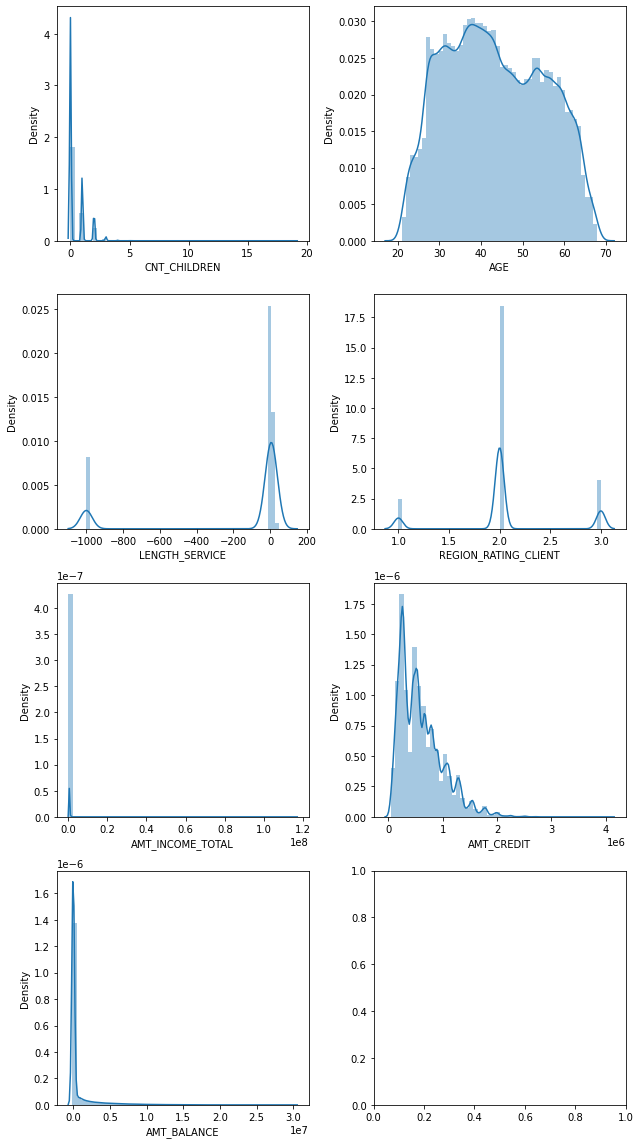

In [174]:
fig, axes = plt.subplots(4,2, figsize=(9,16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(num_feature):
  plot= sns.distplot(df_train[col], ax=axes[i])

plt.tight_layout()
plt.show()

In [175]:
df_trainLE = df_train.copy()

cat = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AMT_CREDIT_SUM']
LE = LabelEncoder()
df_trainLE[cat] = df_trainLE[cat].apply(LE.fit_transform)
df_trainLE = df_trainLE.iloc[:,1:]
df_trainLE.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,LENGTH_SERVICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,AMT_CREDIT_SUM,AMT_BALANCE
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,Working,4,3,1,0.018801,25,1,1.0,2,1,0.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,State servant,1,1,1,0.003541,45,3,2.0,1,1,0.0
2,0,0,1,0,1,0,99000.0,490495.5,27517.5,State servant,4,1,1,0.035792,46,4,2.0,2,1,0.0
3,0,0,0,1,1,1,171000.0,1560726.0,41301.0,Commercial associate,1,1,1,0.035792,37,8,3.0,2,1,0.0
4,0,0,1,1,1,0,360000.0,1530000.0,42075.0,State servant,1,1,1,0.003122,51,1,2.0,3,1,0.0


In [176]:
df_trainLE = df_trainLE.drop(['NAME_INCOME_TYPE'], axis=1)

In [177]:
df_trainLE

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,LENGTH_SERVICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,AMT_CREDIT_SUM,AMT_BALANCE
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,4,3,1,0.018801,25,1,1.0,2,1,0.000
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1,1,1,0.003541,45,3,2.0,1,1,0.000
2,0,0,1,0,1,0,99000.0,490495.5,27517.5,4,1,1,0.035792,46,4,2.0,2,1,0.000
3,0,0,0,1,1,1,171000.0,1560726.0,41301.0,1,1,1,0.035792,37,8,3.0,2,1,0.000
4,0,0,1,1,1,0,360000.0,1530000.0,42075.0,1,1,1,0.003122,51,1,2.0,3,1,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206271,0,0,0,0,1,1,94500.0,225000.0,10620.0,4,1,1,0.010966,44,23,3.0,2,1,105093.855
206272,0,0,0,0,1,0,112500.0,345510.0,17770.5,1,3,1,0.022800,32,1,1.0,2,1,2205557.640
206273,0,0,0,0,1,0,112500.0,225000.0,22050.0,4,3,1,0.022800,66,-1001,1.0,2,1,0.000
206274,0,0,0,0,1,0,153000.0,677664.0,29979.0,1,2,1,0.005002,41,21,1.0,3,1,0.000


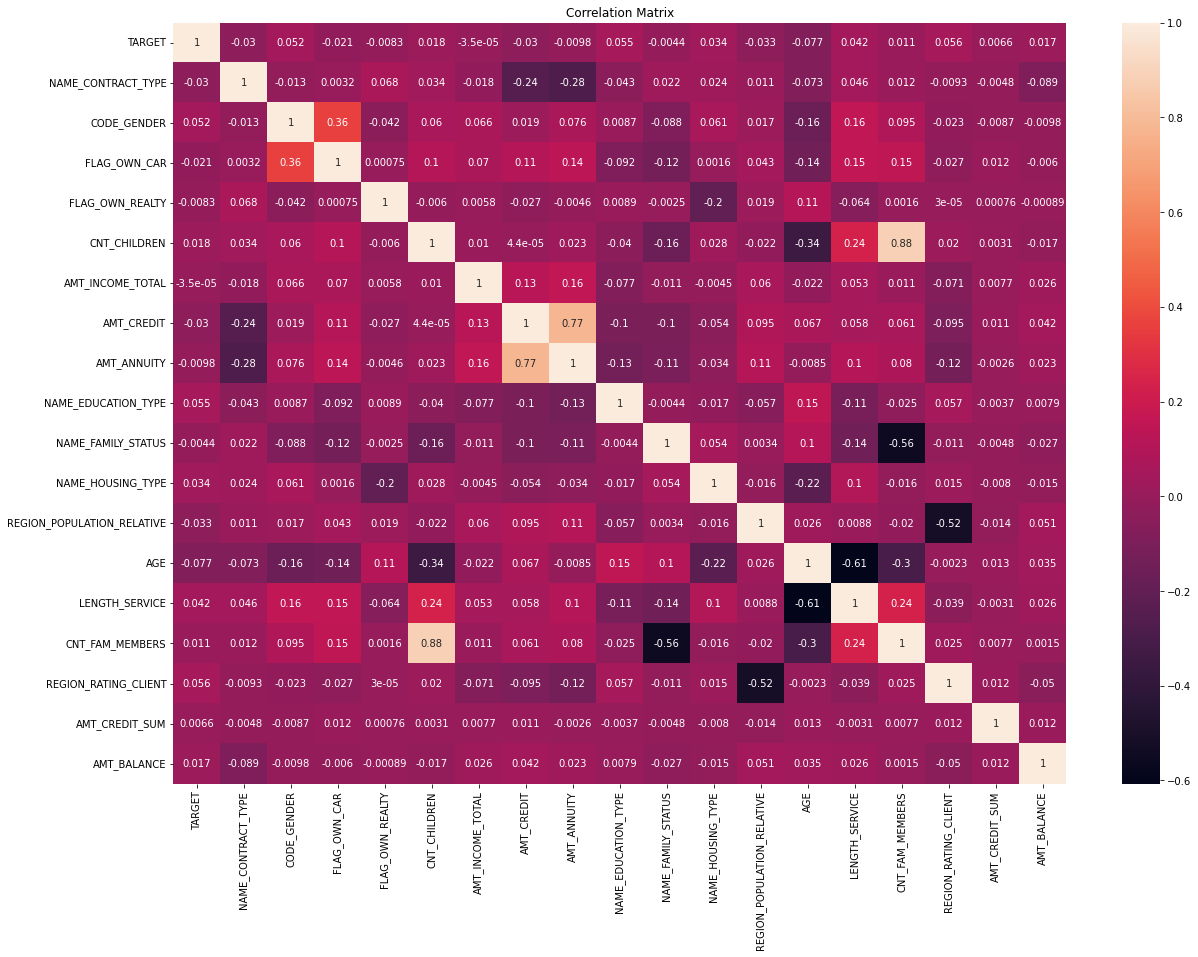

In [178]:
plt.figure(figsize=(20,14))
sns.heatmap(df_trainLE.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()


## 4 - MODELING MACHINE LEARNING

**Home Credit** is an international non-bank financial institution founded in 1997 in the Czech Republic and headquarters in Netherlands. The company operates in 9 countries including Indonesia and focuses on installment lending primarily to people with little or no credit history. In this case, we need to predict our customer who are able to pay the loan do not get rejected. The label is divided become 2 parts, 
*   **Label 1**: client with payment difficulties
*   **Label 0**: client without payment difficulties



We will use two algorithm to measure our model,
1.   Logistic Regression
2.   Gradient Boosting Classifier



### a. Data Preparation

In [179]:
X = df_trainLE.drop(['TARGET'], axis=1)
y = df_trainLE['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

print('Data shape X_training', X_train.shape)
print('Data shape X_test', X_test.shape)
print('Data shape y_training', y_train.shape)
print('Data shape y_test', y_test.shape)

Data shape X_training (144393, 18)
Data shape X_test (61883, 18)
Data shape y_training (144393,)
Data shape y_test (61883,)


In [180]:
scaler = MinMaxScaler().fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 1. Logistic Regression

In [181]:
logreg = LogisticRegression().fit(X_train, y_train)
print(logreg)

LogisticRegression()


#### Data Unbalancing

##### Data Taining Performance

In [182]:
y_train_pred = logreg.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    132456
           1       0.00      0.00      0.00     11937

    accuracy                           0.92    144393
   macro avg       0.46      0.50      0.48    144393
weighted avg       0.84      0.92      0.88    144393



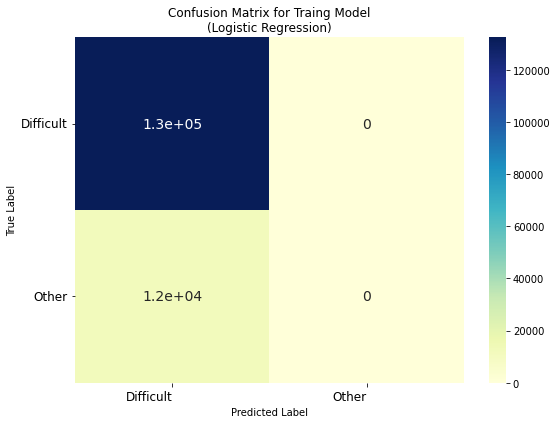

In [183]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)),
                                  ('Difficult', 'Other'),('Difficult','Other'))

plt.figure(figsize=(8,6))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14},
                      cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
plt.title('Confusion Matrix for Traing Model\n(Logistic Regression)', fontsize=12)
plt.ylabel('True Label', fontsize=10)
plt.xlabel('Predicted Label', fontsize=10)
plt.tight_layout()
plt.show()

##### Data Testing Performance

In [184]:
y_test_pred = logreg.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56744
           1       0.00      0.00      0.00      5139

    accuracy                           0.92     61883
   macro avg       0.46      0.50      0.48     61883
weighted avg       0.84      0.92      0.88     61883



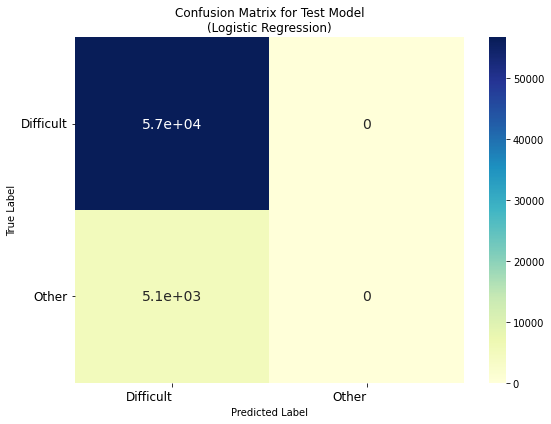

In [185]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)),
                                  ('Difficult', 'Other'),('Difficult','Other'))

plt.figure(figsize=(8,6))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14},
                      cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
plt.title('Confusion Matrix for Test Model\n(Logistic Regression)', fontsize=12)
plt.ylabel('True Label', fontsize=10)
plt.xlabel('Predicted Label', fontsize=10)
plt.tight_layout()
plt.show()

#### Data Balancing

In [186]:
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [187]:
logreg = LogisticRegression().fit(X_resampled, y_resampled)
print(logreg)

LogisticRegression()


##### Data Training Performance (balance)

In [188]:
y_train_pred_resample = logreg.predict(X_resampled)
print(classification_report(y_resampled, y_train_pred_resample))

              precision    recall  f1-score   support

           0       0.61      0.60      0.60    132456
           1       0.60      0.61      0.61    132456

    accuracy                           0.60    264912
   macro avg       0.60      0.60      0.60    264912
weighted avg       0.60      0.60      0.60    264912



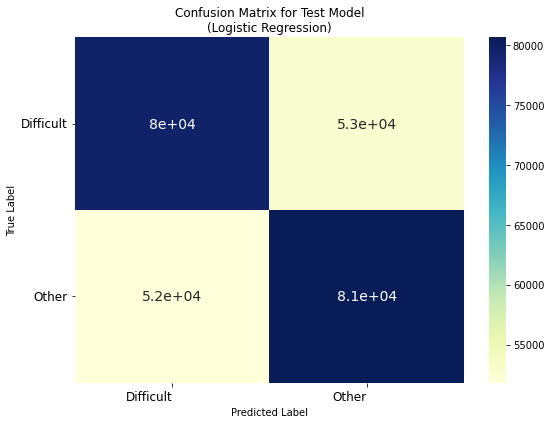

In [189]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_resampled, y_train_pred_resample)),
                                  ('Difficult', 'Other'),('Difficult','Other'))

plt.figure(figsize=(8,6))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14},
                      cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
plt.title('Confusion Matrix for Test Model\n(Logistic Regression)', fontsize=12)
plt.ylabel('True Label', fontsize=10)
plt.xlabel('Predicted Label', fontsize=10)
plt.tight_layout()
plt.show()

##### Data Testing Performance (balance)

In [190]:
y_test_pred_resample = logreg.predict(X_resampled)
print(classification_report(y_resampled, y_test_pred_resample))

              precision    recall  f1-score   support

           0       0.61      0.60      0.60    132456
           1       0.60      0.61      0.61    132456

    accuracy                           0.60    264912
   macro avg       0.60      0.60      0.60    264912
weighted avg       0.60      0.60      0.60    264912



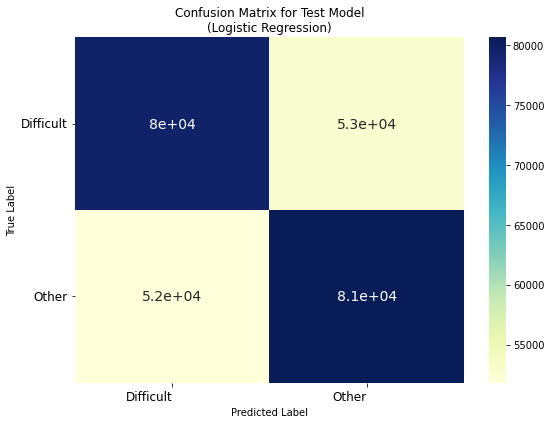

In [191]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_resampled, y_test_pred_resample)),
                                  ('Difficult', 'Other'),('Difficult','Other'))

plt.figure(figsize=(8,6))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14},
                      cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
plt.title('Confusion Matrix for Test Model\n(Logistic Regression)', fontsize=12)
plt.ylabel('True Label', fontsize=10)
plt.xlabel('Predicted Label', fontsize=10)
plt.tight_layout()
plt.show()

### 2. Gradient Boosting Classifier

### Data Unbalancing

##### Data Training Performance

In [192]:
gbc = GradientBoostingClassifier().fit(X_train, y_train)
print(gbc)

GradientBoostingClassifier()


In [193]:
y_train_pred = gbc.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    132456
           1       1.00      0.00      0.00     11937

    accuracy                           0.92    144393
   macro avg       0.96      0.50      0.48    144393
weighted avg       0.92      0.92      0.88    144393



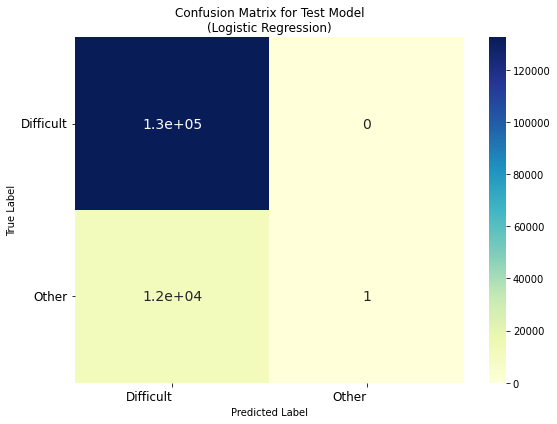

In [194]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)),
                                  ('Difficult', 'Other'),('Difficult','Other'))

plt.figure(figsize=(8,6))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14},
                      cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
plt.title('Confusion Matrix for Test Model\n(Logistic Regression)', fontsize=12)
plt.ylabel('True Label', fontsize=10)
plt.xlabel('Predicted Label', fontsize=10)
plt.tight_layout()
plt.show()

##### Data Testing Performance

In [195]:
y_test_pred = gbc.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56744
           1       0.00      0.00      0.00      5139

    accuracy                           0.92     61883
   macro avg       0.46      0.50      0.48     61883
weighted avg       0.84      0.92      0.88     61883



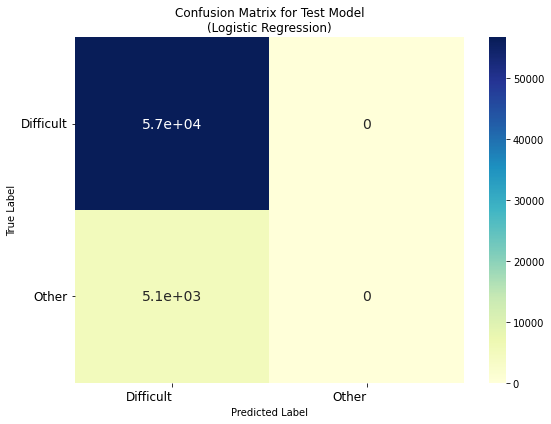

In [196]:
  confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)),
                                  ('Difficult', 'Other'),('Difficult','Other'))

plt.figure(figsize=(8,6))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14},
                      cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
plt.title('Confusion Matrix for Test Model\n(Logistic Regression)', fontsize=12)
plt.ylabel('True Label', fontsize=10)
plt.xlabel('Predicted Label', fontsize=10)
plt.tight_layout()
plt.show()

#### Data Balancing

In [197]:
gbc = GradientBoostingClassifier().fit(X_resampled, y_resampled)
print(gbc)

GradientBoostingClassifier()


In [198]:
y_train_pred_resample = gbc.predict(X_resampled)
print(classification_report(y_resampled, y_train_pred_resample))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89    132456
           1       0.95      0.81      0.87    132456

    accuracy                           0.88    264912
   macro avg       0.89      0.88      0.88    264912
weighted avg       0.89      0.88      0.88    264912



### Impement Model

In [199]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34064 entries, 0 to 34063
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   34064 non-null  int64  
 1   NAME_CONTRACT_TYPE           34064 non-null  object 
 2   CODE_GENDER                  34064 non-null  object 
 3   FLAG_OWN_CAR                 34064 non-null  object 
 4   FLAG_OWN_REALTY              34064 non-null  object 
 5   CNT_CHILDREN                 34064 non-null  int64  
 6   AMT_INCOME_TOTAL             34064 non-null  float64
 7   AMT_CREDIT                   34064 non-null  float64
 8   AMT_ANNUITY                  34064 non-null  float64
 9   AMT_GOODS_PRICE              34064 non-null  float64
 10  NAME_EDUCATION_TYPE          34064 non-null  object 
 11  NAME_FAMILY_STATUS           34064 non-null  object 
 12  NAME_HOUSING_TYPE            34064 non-null  object 
 13  REGION_POPULATIO

In [200]:
df_test1 = df_test.copy()

cat = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AMT_CREDIT_SUM']
LE = LabelEncoder()
df_test1[cat] = df_test1[cat].apply(LE.fit_transform)
df_test1 = df_test1.iloc[:,1:]

In [201]:
df_test1 = df_test1.drop(['AMT_GOODS_PRICE', 'DAYS_REGISTRATION'], axis=1)

In [202]:
df_test1

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,LENGTH_SERVICE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT_SUM,AMT_BALANCE
0,0,0,0,1,0,135000.0,568800.0,20560.5,1,1,1,0.018850,52,6,2,2,1,2.135020e+06
1,0,1,0,1,0,99000.0,222768.0,17370.0,4,1,1,0.035792,49,12,2,2,1,2.135020e+06
2,0,0,0,1,2,315000.0,1575000.0,49018.5,4,1,1,0.026392,38,5,2,2,1,3.961678e+05
3,0,0,1,1,0,270000.0,959688.0,34600.5,4,1,1,0.025164,50,32,2,2,1,2.801919e+06
4,0,1,1,1,2,180000.0,499221.0,22117.5,1,1,1,0.022800,45,7,2,2,1,2.135020e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34059,0,0,1,0,3,135000.0,252022.5,23112.0,4,0,1,0.009175,32,1,2,2,1,2.135020e+06
34060,0,0,0,1,0,121500.0,412560.0,17473.5,4,4,1,0.002042,54,14,3,3,1,2.135020e+06
34061,0,0,1,1,1,202500.0,315000.0,33205.5,4,1,1,0.026392,43,8,2,2,1,2.135020e+06
34062,0,1,0,0,0,225000.0,450000.0,25128.0,1,1,1,0.018850,38,7,2,2,1,2.135020e+06


In [211]:
X_train = df_trainLE.iloc[:,1:]
y_train = df_trainLE['TARGET']
X_test = df_test1.copy()

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)



In [221]:
logreg = LogisticRegression()
logreg.fit(X_resampled, y_resampled)

y_pred = logreg.predict(X_test)

In [222]:
df_test_final = df_test1.copy()
df_test_final['TARGET'] = y_pred.tolist()
df_test_final

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,LENGTH_SERVICE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT_SUM,AMT_BALANCE,TARGET
0,0,0,0,1,0,135000.0,568800.0,20560.5,1,1,1,0.018850,52,6,2,2,1,2.135020e+06,0
1,0,1,0,1,0,99000.0,222768.0,17370.0,4,1,1,0.035792,49,12,2,2,1,2.135020e+06,1
2,0,0,0,1,2,315000.0,1575000.0,49018.5,4,1,1,0.026392,38,5,2,2,1,3.961678e+05,1
3,0,0,1,1,0,270000.0,959688.0,34600.5,4,1,1,0.025164,50,32,2,2,1,2.801919e+06,0
4,0,1,1,1,2,180000.0,499221.0,22117.5,1,1,1,0.022800,45,7,2,2,1,2.135020e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34059,0,0,1,0,3,135000.0,252022.5,23112.0,4,0,1,0.009175,32,1,2,2,1,2.135020e+06,1
34060,0,0,0,1,0,121500.0,412560.0,17473.5,4,4,1,0.002042,54,14,3,3,1,2.135020e+06,0
34061,0,0,1,1,1,202500.0,315000.0,33205.5,4,1,1,0.026392,43,8,2,2,1,2.135020e+06,0
34062,0,1,0,0,0,225000.0,450000.0,25128.0,1,1,1,0.018850,38,7,2,2,1,2.135020e+06,1


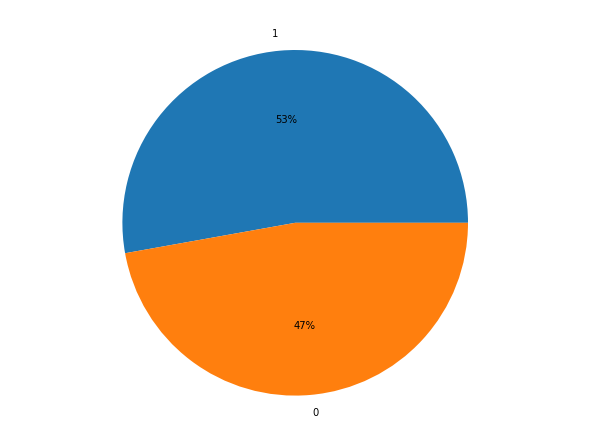

In [223]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('Equal')
labels = ['1', '0']
difficulties = df_test_final.TARGET.value_counts()
ax.pie(difficulties, labels=labels, autopct='%.0f%%')
plt.tight_layout()
plt.show()

## 5 - Business Recommendation


1.   Home Credit can give extra attention for the customer who undergo some difficulties. For instance, the customer using cash loans, smaller annuity, married have a tendency for difficulties. We can make a **special program**. 
2.   Using Machine Learning we can modelling customer segmentation to have a special care for each segment. For example, the customer who have a smaller annuity, married, unemployed have a tendency to be failed for credit loan. Using segmentation, we can map out the well-structured program for each of segment.

